### Support Vector Regression Task

##### 한국 방문자 수 예측

- date: 날짜 (년-월)
- nation: 방문자의 국가
- visitor: 방문자 수
- growth: 전년 동월 대비 방문객 수 성장률
- share: 해당 월의 전체 방문자 중 해당 국가 비율

##### 년도와 국가를 입력해서 예상 방문자 수를 예측하세요.

In [1]:
import pandas as pd

visitor_df = pd.read_csv('./datasets/korea_visitor.csv')
visitor_df

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...
955,2020-4,Oceania others,13,-97.239915,0.044195,0,0,0,0,13
956,2020-4,South Africa,22,-98.101812,0.074792,2,0,0,0,20
957,2020-4,Africa others,177,-95.412131,0.601734,11,5,0,11,150
958,2020-4,Stateless,3,-95.312500,0.010199,0,0,0,0,3


In [2]:
visitor_df.isna().sum()

date                0
nation              0
visitor             0
growth              0
share               0
tourism             0
business            0
official affairs    0
studying            0
others              0
dtype: int64

In [3]:
visitor_df.duplicated().sum()

0

In [4]:
visitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


In [5]:
visitor_df.date = visitor_df.date.apply(lambda date: date.split("-")[0])

In [7]:
visitor_df = visitor_df.rename(columns={'date': 'year'})
visitor_df


,year,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019,Macao,2570,-12.376406,0.232621,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...
955,2020,Oceania others,13,-97.239915,0.044195,0,0,0,0,13
956,2020,South Africa,22,-98.101812,0.074792,2,0,0,0,20
957,2020,Africa others,177,-95.412131,0.601734,11,5,0,11,150
958,2020,Stateless,3,-95.312500,0.010199,0,0,0,0,3


In [8]:
visitor_df.year.value_counts()

year
2019    720
2020    240
Name: count, dtype: int64

In [11]:
visitor_df = visitor_df.visitor.groupby(by=[visitor_df.year, visitor_df.nation]).sum().reset_index()
visitor_df

,year,nation,visitor
0,2019,*GCC,35054
1,2019,Africa others,47115
2,2019,America others,41943
3,2019,Asia others,73929
4,2019,Austrailia,173218
...,...,...,...
115,2020,UK,16154
116,2020,USA,126681
117,2020,Ukraine,4319
118,2020,Uzbekistan,13812


In [12]:
visitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     120 non-null    object
 1   nation   120 non-null    object
 2   visitor  120 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [13]:
visitor_df.year = visitor_df.year.astype('int16')
visitor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     120 non-null    int16 
 1   nation   120 non-null    object
 2   visitor  120 non-null    int64 
dtypes: int16(1), int64(1), object(1)
memory usage: 2.2+ KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2960\1767632309.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


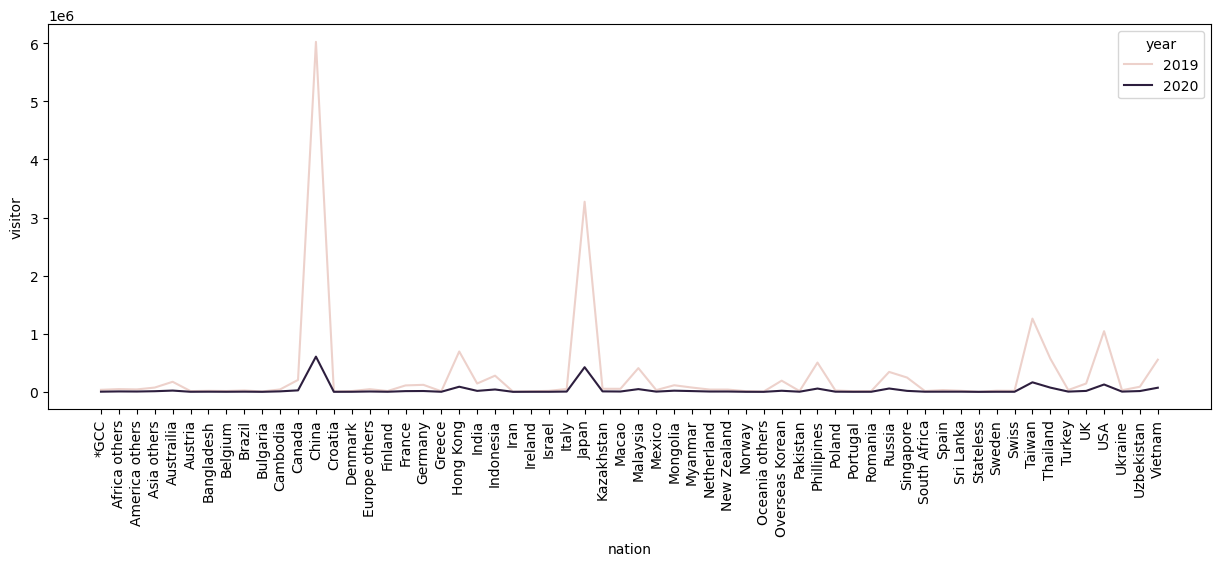

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plot = sns.lineplot(x='nation', y='visitor', data=visitor_df, hue='year')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
visitor_df.nation = encoder.fit_transform(visitor_df.nation)
print(encoder.classes_)

['*GCC' 'Africa others' 'America others' 'Asia others' 'Austrailia'
 'Austria' 'Bangladesh' 'Belgium' 'Brazil' 'Bulgaria' 'Cambodia' 'Canada'
 'China' 'Croatia' 'Denmark' 'Europe others' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'India' 'Indonesia' 'Iran' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Macao' 'Malaysia' 'Mexico' 'Mongolia'
 'Myanmar' 'Netherland' 'New Zealand' 'Norway' 'Oceania others'
 'Overseas Korean' 'Pakistan' 'Phillipines' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Singapore' 'South Africa' 'Spain' 'Sri Lanka' 'Stateless'
 'Sweden' 'Swiss' 'Taiwan' 'Thailand' 'Turkey' 'UK' 'USA' 'Ukraine'
 'Uzbekistan' 'Vietnam']


In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

def get_evaluation(y_test, prediction):
    MAE =  mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)

    print('MAE: {:.4f}, MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'.format(MAE, MSE, RMSE, MSLE, RMSLE, R2))

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

features, targets = visitor_df.iloc[:, :-1], visitor_df.visitor

parmas = {
    'gamma': [0.1, 1], 
    'C': [0.01, 0.1, 1, 10, 100], 
    'epsilon': [0, 0.01, 0.1]
}

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

grid_svr = GridSearchCV(SVR(), param_grid=parmas, cv=3, refit=True, return_train_score=True, scoring='neg_mean_squared_log_error')

# 로그 변환
y_train = np.log1p(y_train)

grid_svr.fit(X_train, y_train)

prediction = grid_svr.predict(X_test)

get_evaluation(np.log1p(y_test), prediction)

MAE: 0.9573, MSE: 1.4069, RMSE: 1.1861, MSLE: 0.0144, RMSLE: 0.1200, R2: 0.5535


In [18]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_svr.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
25,"{'C': 100, 'epsilon': 0, 'gamma': 1}",-0.029309,1,-0.024737,-0.037565,-0.025626
19,"{'C': 10, 'epsilon': 0, 'gamma': 1}",-0.029309,1,-0.024737,-0.037565,-0.025626
27,"{'C': 100, 'epsilon': 0.01, 'gamma': 1}",-0.029331,3,-0.024761,-0.037592,-0.025639
21,"{'C': 10, 'epsilon': 0.01, 'gamma': 1}",-0.029331,3,-0.024761,-0.037592,-0.025639
29,"{'C': 100, 'epsilon': 0.1, 'gamma': 1}",-0.029542,5,-0.025036,-0.037851,-0.025740
23,"{'C': 10, 'epsilon': 0.1, 'gamma': 1}",-0.029542,5,-0.025036,-0.037851,-0.025740
17,"{'C': 1, 'epsilon': 0.1, 'gamma': 1}",-0.034167,7,-0.028285,-0.045573,-0.028644
15,"{'C': 1, 'epsilon': 0.01, 'gamma': 1}",-0.034219,8,-0.028153,-0.045610,-0.028894
13,"{'C': 1, 'epsilon': 0, 'gamma': 1}",-0.034224,9,-0.028136,-0.045613,-0.028925
11,"{'C': 0.1, 'epsilon': 0.1, 'gamma': 1}",-0.036450,10,-0.030999,-0.048887,-0.029463


In [19]:
visitor_df[visitor_df.nation == 56]

,year,nation,visitor
56,2019,56,1044038
116,2020,56,126681


In [22]:
import numpy as np
prediction = grid_svr.predict(pd.DataFrame([[2021, 56]], columns=['year', 'nation']))
np.expm1(prediction)

array([25515.73182469])